In [9]:
import numpy as np
import cv2
import time
import os
import Helpers
import CaptureFrame_Process
import Localization
import plate_rotation
import Recognize
import Segment
from pre_processing_data import read_reference_characters
import character_recognition

In [2]:
# Load Image
path = 'dataset/Frames/Category_I/'
name = 'plate4.jpg'
img = cv2.imread(path+name)

0.015609025955200195


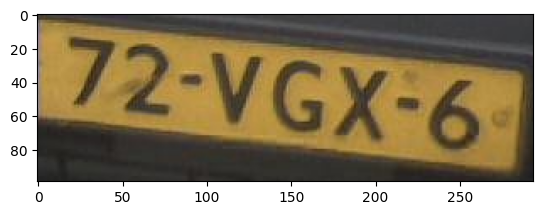

In [3]:
# Localization
start = time.time()
plates = Localization.plate_detection(img)
end = time.time()-start
print(end)
for plate in plates:
    Helpers.plotImage(plate)

0.004900455474853516


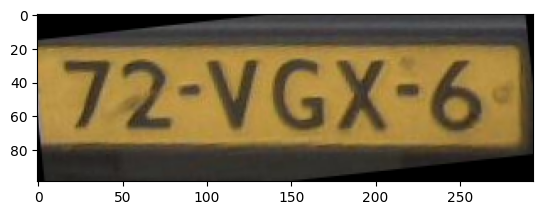

In [4]:
# Rotation
start = time.time()
plate = plates[0]
rotated = plate_rotation.rotation_pipeline(plate)
end = time.time()-start
print(end)
Helpers.plotImage(rotated)

In [5]:
# Segmentation
start = time.time()
chars, dashes = Segment.segment(rotated, show=False)
end = time.time()-start
print(end)

0.002398252487182617


In [6]:
# Segmentation with contours
start = time.time()
chars = Recognize.character_segmentation(rotated)
end = time.time()-start
print(end)

0.0009906291961669922


In [7]:
# Read reference characters
start = time.time()
reference_characters: list = read_reference_characters('./dataset/Lab07-Dataset')
end = time.time()-start
print(end)

0.013759374618530273


In [8]:
# Recognize
start = time.time()
for char in chars: 
    scores, output = character_recognition.recognise_character(reference_characters, char)
    print(output)
end = time.time()-start
print(end)

TypeError: '<' not supported between instances of 'tuple' and 'int'

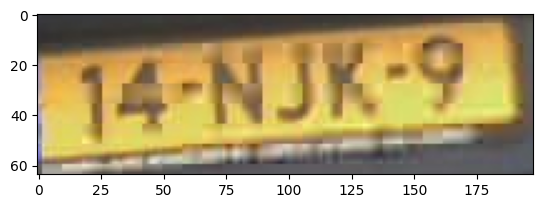

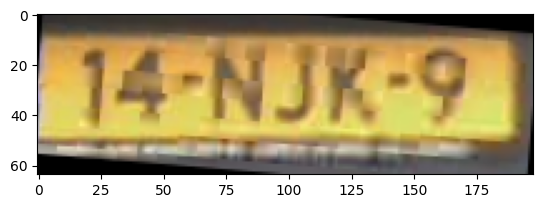

True

In [9]:
img = cv2.imread("dataset/Frames/Category_I/plate6.jpg")
plate = Localization.plate_detection(img)[0]
Helpers.plotImage(plate)
rotated = plate_rotation.rotation_pipeline(plate)
Helpers.plotImage(rotated)
cv2.imwrite('dataset/Posters/rotated.jpg', rotated)